# 🍷 Youth Alcohol Use Prediction Using Tree-Based Models

This notebook explores social, behavioral, and demographic factors contributing to alcohol consumption among youth using decision tree-based methods.

We use machine learning problem type:
- **Multiclass Classification** (Seldom / Sometimes / Frequent)

We evaluate Decision Tree, Bagging, Random Forest, and Gradient Boosting models using accuracy, F1-score, confusion matrices.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

df = pd.read_csv("youth_data.csv")

missing_codes = [91, 93, 94, 97, 98, 99, 991, 993, 997, 998, 999]
df = df.replace(missing_codes, np.nan)

df = df[df['ALCYDAYS'] != 6]

def map_alc_use(x):
    if x in [1, 2]:
        return 2  # Frequent
    elif x == 3:
        return 1  # Sometimes
    else:  # 4 or 5
        return 0  # Seldom

df['ALC_CLASS'] = df['ALCYDAYS'].apply(map_alc_use)

predictors = [
    'IRMJAGE', 'EDUSCHGRD2', 'TOBFLAG', 'NEWRACE2',
    'EDUSKPCOM', 'HEALTH2', 'INCOME', 'POVERTY3', 'DRPRVME3',
    'FRDADLY2', 'PRVDRGO2', 'PRPROUD2',
    'PRTALK3', 'TALKPROB', 'PREVIOL2', 'FRDMJMON', 'SCHFELT'
]

df = df.dropna(subset=predictors + ['ALC_CLASS'])

X = df[predictors]
y = df['ALC_CLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Multiclass Classification Report – Decision Tree:")
print(classification_report(y_test, y_pred, target_names=["Seldom", "Sometimes", "Frequent"]))

conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix – Multiclass Alcohol Use:")
print(pd.DataFrame(
    conf_mat,
    index=["Actual: Seldom", "Actual: Sometimes", "Actual: Frequent"],
    columns=["Predicted: Seldom", "Predicted: Sometimes", "Predicted: Frequent"]
))

 Multiclass Classification Report – Decision Tree:
              precision    recall  f1-score   support

      Seldom       0.06      0.09      0.07        11
   Sometimes       0.12      0.15      0.14        26
    Frequent       0.82      0.76      0.79       159

    accuracy                           0.64       196
   macro avg       0.34      0.34      0.33       196
weighted avg       0.69      0.64      0.66       196

Confusion Matrix – Multiclass Alcohol Use:
                   Predicted: Seldom  Predicted: Sometimes  \
Actual: Seldom                     1                     2   
Actual: Sometimes                  4                     4   
Actual: Frequent                  11                    27   

                   Predicted: Frequent  
Actual: Seldom                       8  
Actual: Sometimes                   18  
Actual: Frequent                   121  


In [2]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor

tree_summary = export_text(model, feature_names=X.columns.tolist())
print(tree_summary)

|--- TOBFLAG <= 0.50
|   |--- IRMJAGE <= 11.50
|   |   |--- INCOME <= 3.50
|   |   |   |--- EDUSCHGRD2 <= 7.50
|   |   |   |   |--- IRMJAGE <= 10.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- IRMJAGE >  10.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- EDUSCHGRD2 >  7.50
|   |   |   |   |--- class: 1
|   |   |--- INCOME >  3.50
|   |   |   |--- IRMJAGE <= 9.50
|   |   |   |   |--- class: 2
|   |   |   |--- IRMJAGE >  9.50
|   |   |   |   |--- EDUSCHGRD2 <= 4.50
|   |   |   |   |   |--- NEWRACE2 <= 4.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- NEWRACE2 >  4.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- EDUSCHGRD2 >  4.50
|   |   |   |   |   |--- class: 1
|   |--- IRMJAGE >  11.50
|   |   |--- EDUSCHGRD2 <= 3.50
|   |   |   |--- POVERTY3 <= 1.50
|   |   |   |   |--- class: 2
|   |   |   |--- POVERTY3 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- EDUSCHGRD2 >  3.50
|   |   |   |--- DRPRVME3 <= 1.50
|   |   |   |   |--- INCOME <

In [3]:
importances = pd.DataFrame({'feature_name': X.columns, 'importance': model.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
print(importances)

   feature_name  importance
0       IRMJAGE    0.154498
1    EDUSCHGRD2    0.132694
2       HEALTH2    0.099710
3      NEWRACE2    0.093370
4        INCOME    0.075628
5     EDUSKPCOM    0.065504
6       SCHFELT    0.060239
7       TOBFLAG    0.043323
8      POVERTY3    0.038764
9      TALKPROB    0.036748
10      PRTALK3    0.035796
11     FRDADLY2    0.033555
12     DRPRVME3    0.033152
13     PRPROUD2    0.032570
14     FRDMJMON    0.026089
15     PREVIOL2    0.020998
16     PRVDRGO2    0.017362


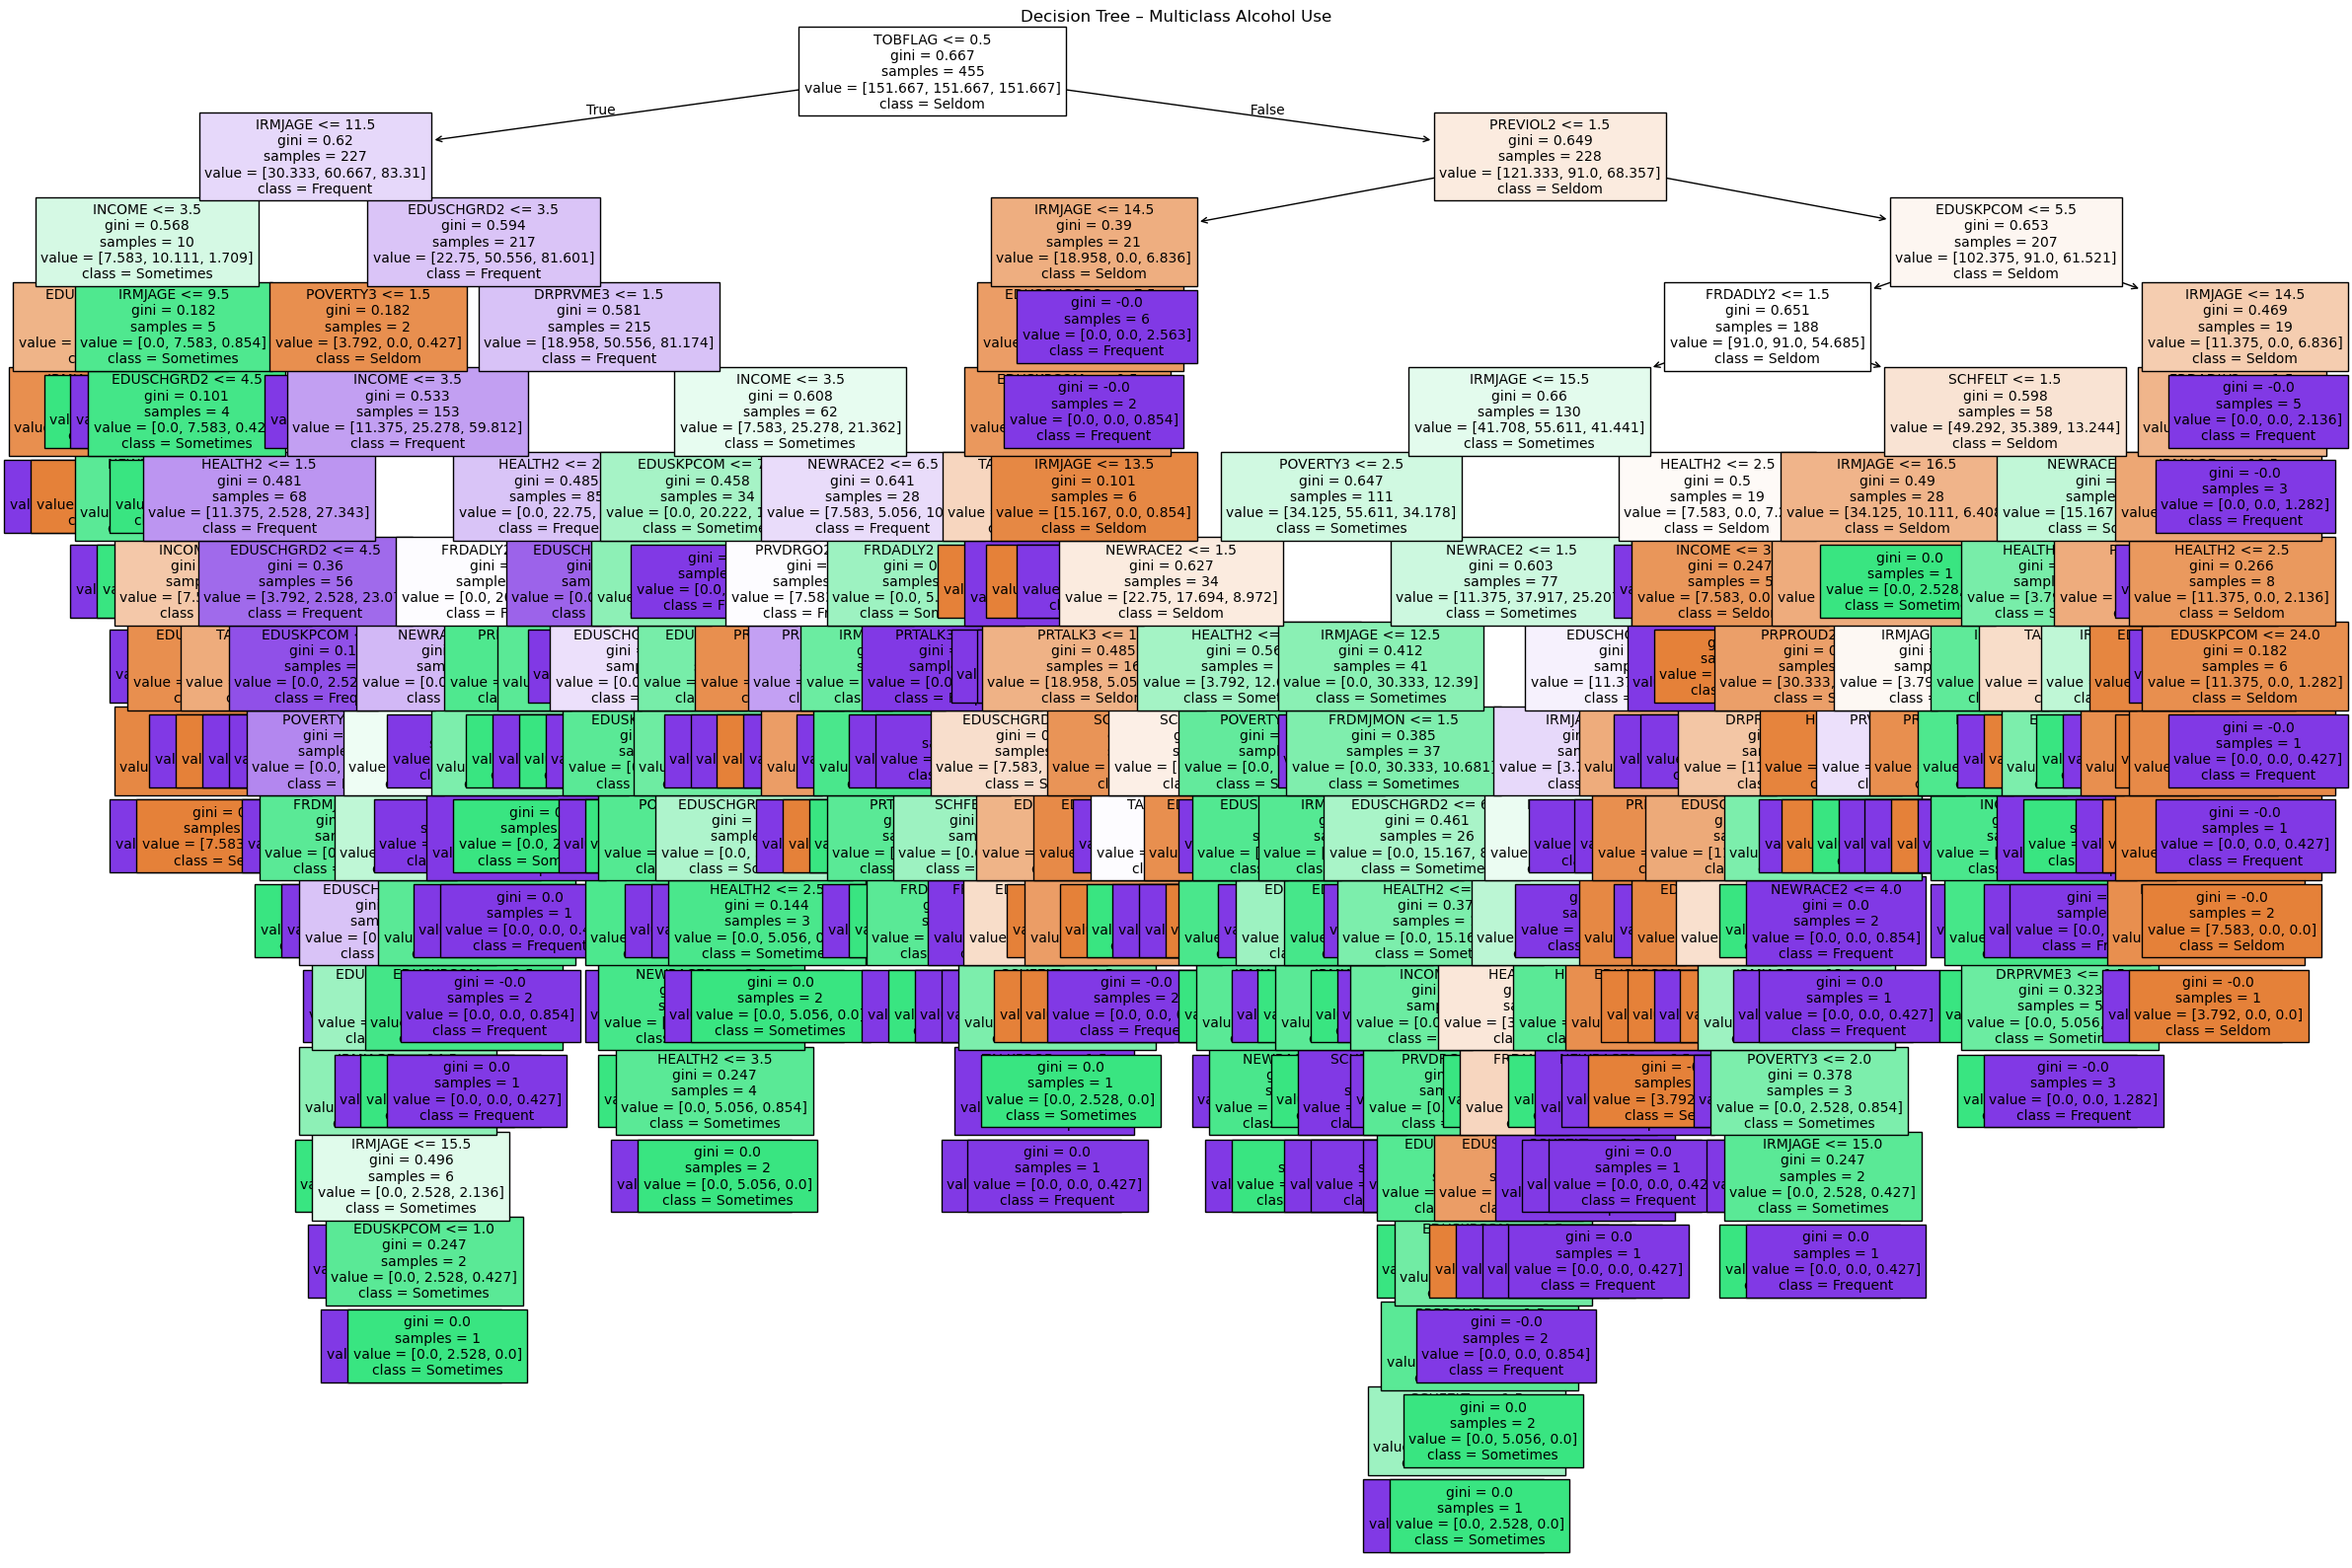

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 16))  
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=['Seldom', 'Sometimes', 'Frequent'],
    label='all',
    fontsize=10
)
plt.title("Decision Tree – Multiclass Alcohol Use")
plt.tight_layout()
plt.show()

In [5]:
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 64.29%


In [6]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)

print("Bagging Results")
print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag, target_names=["Seldom", "Sometimes", "Frequent"]))

Bagging Results
[[  0   0  11]
 [  0   0  26]
 [  0   5 154]]
              precision    recall  f1-score   support

      Seldom       0.00      0.00      0.00        11
   Sometimes       0.00      0.00      0.00        26
    Frequent       0.81      0.97      0.88       159

    accuracy                           0.79       196
   macro avg       0.27      0.32      0.29       196
weighted avg       0.65      0.79      0.71       196



/Users/sanro/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanro/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanro/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=["Seldom", "Sometimes", "Frequent"]))

Random Forest Results
[[  0   0  11]
 [  0   1  25]
 [  0   3 156]]
              precision    recall  f1-score   support

      Seldom       0.00      0.00      0.00        11
   Sometimes       0.25      0.04      0.07        26
    Frequent       0.81      0.98      0.89       159

    accuracy                           0.80       196
   macro avg       0.35      0.34      0.32       196
weighted avg       0.69      0.80      0.73       196



/Users/sanro/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanro/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanro/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
)
gb_model.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_gb = gb_model.predict(X_test)

print(" Gradient Boosting Results")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb, target_names=["Seldom", "Sometimes", "Frequent"]))

 Gradient Boosting Results
[[  1   1   9]
 [  6   6  14]
 [ 11  35 113]]
              precision    recall  f1-score   support

      Seldom       0.06      0.09      0.07        11
   Sometimes       0.14      0.23      0.18        26
    Frequent       0.83      0.71      0.77       159

    accuracy                           0.61       196
   macro avg       0.34      0.34      0.34       196
weighted avg       0.70      0.61      0.65       196



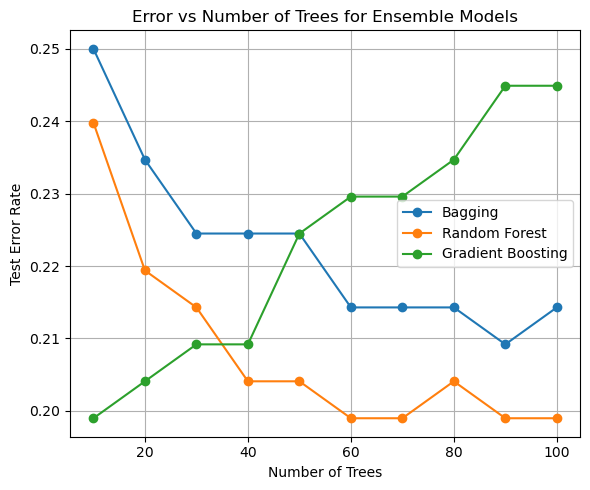

In [9]:
tree_range = range(10, 110, 10)
bag_errors, rf_errors, gb_errors = [], [], []

for n in tree_range:
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(class_weight='balanced'),
        n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    bag_errors.append(1 - accuracy_score(y_test, y_pred))

    rf = RandomForestClassifier(
        n_estimators=n, class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_errors.append(1 - accuracy_score(y_test, y_pred))

    gb = GradientBoostingClassifier(
        n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    gb_errors.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 5))
plt.plot(tree_range, bag_errors, label="Bagging", marker='o')
plt.plot(tree_range, rf_errors, label="Random Forest", marker='o')
plt.plot(tree_range, gb_errors, label="Gradient Boosting", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Test Error Rate")
plt.title("Error vs Number of Trees for Ensemble Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





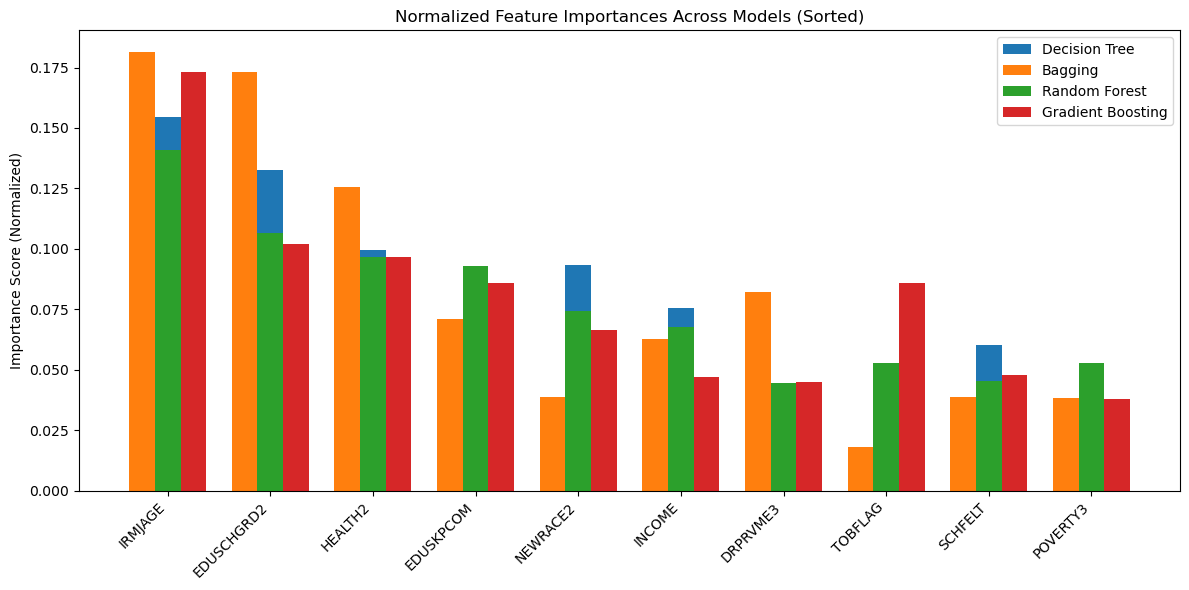

In [10]:
dt_importances = model.feature_importances_
bag_importances = bagging_model.estimators_[0].feature_importances_
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

features = X_train.columns

importance_df = pd.DataFrame({
    
    'Feature': features,
    'Decision Tree': dt_importances,
    'Bagging': bag_importances,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances
})

importance_df[['Decision Tree','Bagging', 'Random Forest', 'Gradient Boosting']] = importance_df[
    ['Decision Tree','Bagging', 'Random Forest', 'Gradient Boosting']
].div(importance_df[
    ['Decision Tree','Bagging', 'Random Forest', 'Gradient Boosting']
].sum(axis=0), axis=1)

importance_df['Average'] = importance_df[['Decision Tree','Bagging', 'Random Forest', 'Gradient Boosting']].mean(axis=1)
importance_df = importance_df.sort_values('Average', ascending=False).head(10)

x = np.arange(len(importance_df))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x, importance_df['Decision Tree'], width=width, label='Decision Tree')
plt.bar(x - width, importance_df['Bagging'], width=width, label='Bagging')
plt.bar(x, importance_df['Random Forest'], width=width, label='Random Forest')
plt.bar(x + width, importance_df['Gradient Boosting'], width=width, label='Gradient Boosting')

plt.xticks(x, importance_df['Feature'], rotation=45, ha='right')
plt.ylabel("Importance Score (Normalized)")
plt.title("Normalized Feature Importances Across Models (Sorted)")
plt.legend()
plt.tight_layout()
plt.show()


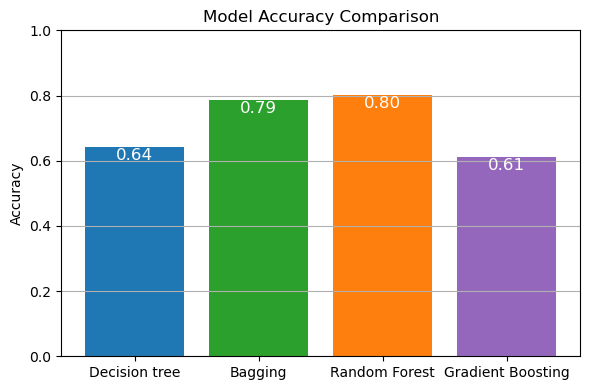

In [11]:
acc_dt = accuracy_score(y_test, model.predict(X_test))
acc_bag = accuracy_score(y_test, bagging_model.predict(X_test))
acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
acc_gb = accuracy_score(y_test, gb_model.predict(X_test))

accuracies = [acc_dt, acc_bag, acc_rf, acc_gb]
labels = ["Decision tree", "Bagging", "Random Forest", "Gradient Boosting"]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, accuracies, color=["#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height - 0.05,
             f"{height:.2f}", ha='center', va='bottom', color='white', fontsize=12)

plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


 Bagging Best Params: {'max_samples': 0.5, 'n_estimators': 150}


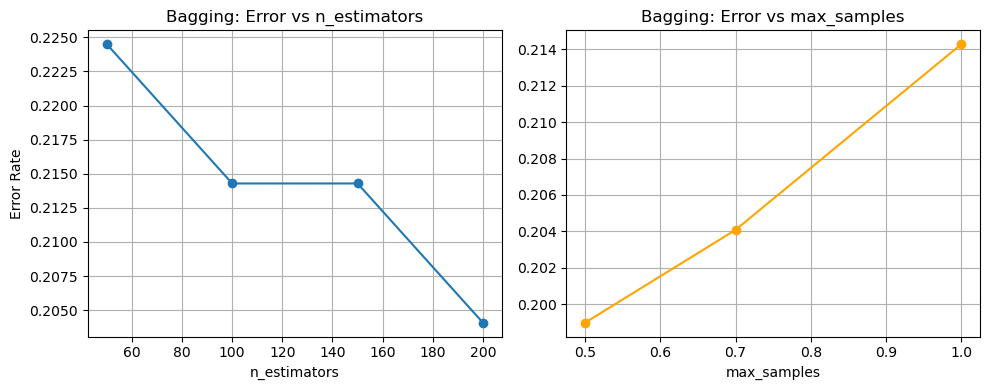

In [12]:
bag_params = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.8, 1.0]
}
bagging_grid = GridSearchCV(
    BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=42),
    param_grid=bag_params,
    cv=5,
)
bagging_grid.fit(X_train, y_train)
bagging_model = bagging_grid.best_estimator_
print("\n Bagging Best Params:", bagging_grid.best_params_)

bagging_estimators = [50, 100, 150, 200]
bagging_samples = [0.5, 0.7, 1.0]
bagging_errors_estimators, bagging_errors_samples = [], []

for n in bagging_estimators:
    model = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    bagging_errors_estimators.append(1 - accuracy_score(y_test, y_pred))

for s in bagging_samples:
    model = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), n_estimators=100, max_samples=s, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    bagging_errors_samples.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(bagging_estimators, bagging_errors_estimators, marker='o')
plt.title("Bagging: Error vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Error Rate")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(bagging_samples, bagging_errors_samples, marker='o', color='orange')
plt.title("Bagging: Error vs max_samples")
plt.xlabel("max_samples")
plt.grid(True)
plt.tight_layout()
plt.show()



 Random Forest Best Params: {'max_depth': 10, 'n_estimators': 50}


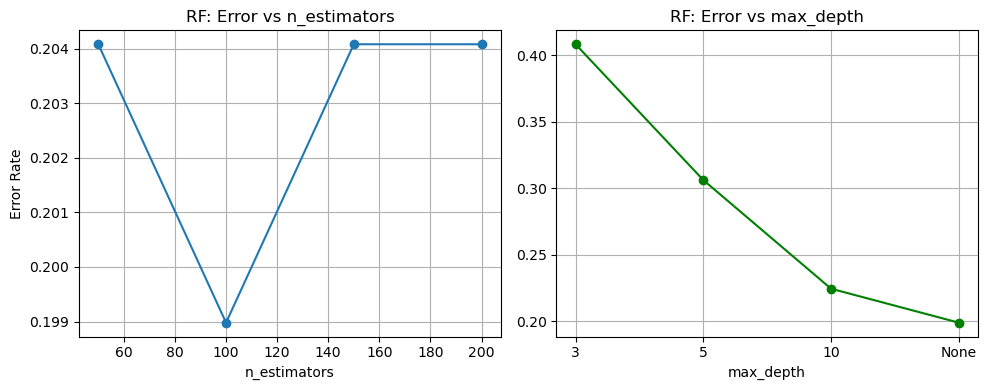

In [13]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None]
}
rf_grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=rf_params,
    cv=5,
)
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_
print("\n Random Forest Best Params:", rf_grid.best_params_)

rf_estimators = [50, 100, 150, 200]
rf_depths = [3, 5, 10, None]
rf_errors_estimators, rf_errors_depth = [], []

for n in rf_estimators:
    model = RandomForestClassifier(n_estimators=n, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rf_errors_estimators.append(1 - accuracy_score(y_test, y_pred))

for d in rf_depths:
    model = RandomForestClassifier(n_estimators=100, max_depth=d, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rf_errors_depth.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(rf_estimators, rf_errors_estimators, marker='o')
plt.title("RF: Error vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Error Rate")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot([str(d) for d in rf_depths], rf_errors_depth, marker='o', color='green')
plt.title("RF: Error vs max_depth")
plt.xlabel("max_depth")
plt.grid(True)
plt.tight_layout()
plt.show()



 Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


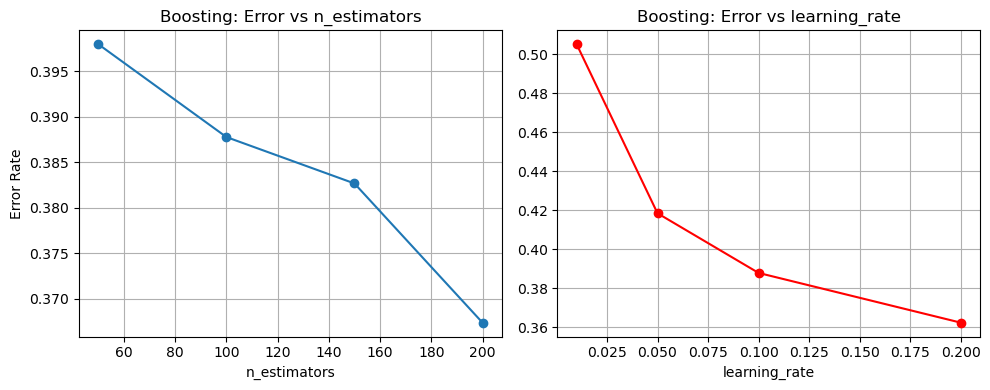

In [14]:
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=gb_params,
    cv=5,
)
gb_grid.fit(X_train, y_train, sample_weight=sample_weights)
gb_model = gb_grid.best_estimator_
print("\n Gradient Boosting Best Params:", gb_grid.best_params_)

gb_estimators = [50, 100, 150, 200]
gb_lrs = [0.01, 0.05, 0.1, 0.2]
gb_errors_estimators, gb_errors_lr = [], []

for n in gb_estimators:
    model = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = model.predict(X_test)
    gb_errors_estimators.append(1 - accuracy_score(y_test, y_pred))

for lr in gb_lrs:
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    model.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = model.predict(X_test)
    gb_errors_lr.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(gb_estimators, gb_errors_estimators, marker='o')
plt.title("Boosting: Error vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Error Rate")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gb_lrs, gb_errors_lr, marker='o', color='red')
plt.title("Boosting: Error vs learning_rate")
plt.xlabel("learning_rate")
plt.grid(True)
plt.tight_layout()
plt.show()


# 📊 Conclusions & Reflections

**Top Predictors**: Education grade level, marijuana age, peer influence, and race consistently ranked as top features.

**Best Models**:

  - **Multiclass Classification**: Random Forest (despite confusion in frequent class)
  - 
**Limitations**:
  - Class imbalance and poor recall for minority classes

## Potential Improvements

- Use **SMOTE** or **class reweighting** for better balance
- Try **ordinal classification** or dimensionality reduction (e.g., PCA)
- Consider testing additional features on mental health or social risk

This work can support better-targeted youth intervention strategies, highlighting the importance of early school engagement, family involvement, and peer environments.